In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = sns.load_dataset('iris')

In [34]:
df

sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]

In [35]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
df['species'] = Encoder.fit_transform(df['species'])

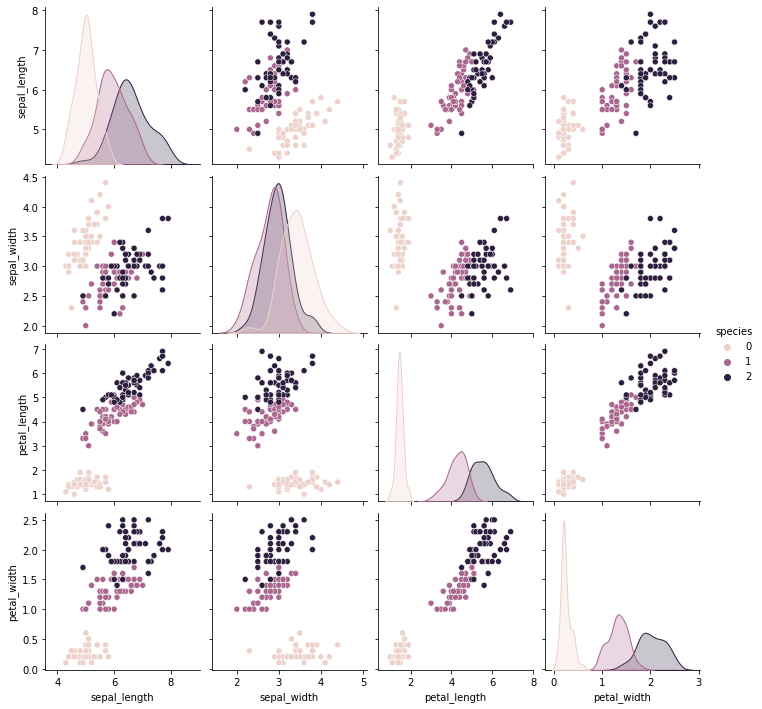

In [36]:
sns.pairplot(df,hue='species')

In [37]:
new_df = df[df['species'] != 0][['sepal_length','sepal_width','species']]

In [38]:
new_df

sepal_length  sepal_width  species
50            7.0          3.2        1
51            6.4          3.2        1
52            6.9          3.1        1
53            5.5          2.3        1
54            6.5          2.8        1
..            ...          ...      ...
145           6.7          3.0        2
146           6.3          2.5        2
147           6.5          3.0        2
148           6.2          3.4        2
149           5.9          3.0        2

[100 rows x 3 columns]

In [39]:
x = df.iloc[:,:2]
y = df.iloc[:,-1]

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [41]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [42]:
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]

In [43]:
for estimator in estimators:
    cv = cross_val_score(estimator[1],x,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(cv),2))

lr 0.81
rf 0.72
knn 0.76


In [44]:
from sklearn.ensemble import VotingClassifier

# Hard Voting

In [45]:
vc = VotingClassifier(estimators = estimators)
acc = cross_val_score(vc,x,y,cv=10,scoring='accuracy')
print(np.round(np.mean(acc),2))

0.77


# Soft Voting

In [47]:
vc1 = VotingClassifier(estimators = estimators , voting = 'soft')
acc = cross_val_score(vc1,x,y,cv=10,scoring='accuracy')
print(np.round(np.mean(acc),2))


0.75


# Weighted Voting

In [48]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            wvc = VotingClassifier(estimators = estimators , voting = 'soft', weights = [i,j,k])
            acc = cross_val_score(wvc,x,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(acc),2))

for i=1,j=1,k=1 0.77
for i=1,j=1,k=2 0.76
for i=1,j=1,k=3 0.76
for i=1,j=2,k=1 0.75
for i=1,j=2,k=2 0.76
for i=1,j=2,k=3 0.77
for i=1,j=3,k=1 0.74
for i=1,j=3,k=2 0.75
for i=1,j=3,k=3 0.75
for i=2,j=1,k=1 0.78
for i=2,j=1,k=2 0.78
for i=2,j=1,k=3 0.77
for i=2,j=2,k=1 0.76
for i=2,j=2,k=2 0.77
for i=2,j=2,k=3 0.76
for i=2,j=3,k=1 0.75
for i=2,j=3,k=2 0.76
for i=2,j=3,k=3 0.77
for i=3,j=1,k=1 0.8
for i=3,j=1,k=2 0.78
for i=3,j=1,k=3 0.79
for i=3,j=2,k=1 0.77
for i=3,j=2,k=2 0.77
for i=3,j=2,k=3 0.77
for i=3,j=3,k=1 0.75
for i=3,j=3,k=2 0.77
for i=3,j=3,k=3 0.77


# Classifiers of same algo

In [51]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
x,y = make_classification(n_samples=1000 , n_features=20,n_informative=15,n_redundant=5,random_state=2)
svm1 = SVC(probability = True, kernel ='poly',degree=1)
svm2 = SVC(probability = True, kernel ='poly',degree=2)
svm3 = SVC(probability = True, kernel ='poly',degree=3)
svm4 = SVC(probability = True, kernel ='poly',degree=4)
svm5 = SVC(probability = True, kernel ='poly',degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm',svm5)]
for estimator in estimators:
    acc = cross_val_score(estimator[1],x,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(acc),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm 0.86


In [52]:
vc_ = VotingClassifier(estimators=estimators,voting='soft')
acc = cross_val_score(vc_,x,y,cv=10,scoring='accuracy')
print('VC ',np.round(np.mean(acc),2))

VC  0.93
